# Diabetes Prediction Model using KNN

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing data

In [145]:
#reading csv using pandas 
input_diabetes_data_1 = pd.read_csv('diabetes.csv')

#first 5 rows of the dataframe.
input_diabetes_data_1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## concating data sets


In [146]:
input_diabetes_data_1.shape

(768, 9)

In [147]:
#to introduce duplicate and show joining from multiple sources i am reading same csv in another data frame and then concating them 
input_diabetes_data_2 = pd.read_csv('diabetes.csv')
frames = [input_diabetes_data_1, input_diabetes_data_2]
input_diabetes_data = pd.concat(frames)
input_diabetes_data.shape

(1536, 9)

## Data Analysis and Cleaning

In [148]:
#see description of data set to know min/max/mean value of columns 
input_diabetes_data.describe().T
#This shows some columns like BMI/SkinThickness/BP/Glucose  has 0 values which doesnt make sense and this is noise in data . 
#I will replace 0 with mean values of each columns

,count,mean,std,min,25%,50%,75%,max
Pregnancies,1536.0,3.845052,3.368480,0.000,1.00000,3.0000,6.00000,17.00
Glucose,1536.0,120.894531,31.962202,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,1536.0,69.105469,19.349501,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,1536.0,20.536458,15.947021,0.000,0.00000,23.0000,32.00000,99.00
Insulin,1536.0,79.799479,115.206457,0.000,0.00000,30.5000,127.25000,846.00
BMI,1536.0,31.992578,7.881592,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,1536.0,0.471876,0.331221,0.078,0.24375,0.3725,0.62625,2.42
Age,1536.0,33.240885,11.756400,21.000,24.00000,29.0000,41.00000,81.00
Outcome,1536.0,0.348958,0.476796,0.000,0.00000,0.0000,1.00000,1.00


In [149]:
#droping the duplicate rows if they exists
input_diabetes_data = input_diabetes_data.drop_duplicates()

In [150]:
input_diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [151]:
#checking count of missing values in each columns. they are not missing values but there are 0's as we have seen above
np.sum(input_diabetes_data.isnull())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [152]:
input_diabetes_data.shape

(768, 9)

# checking data disribution using hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000230BA1BB6A0>,
      dtype=object)

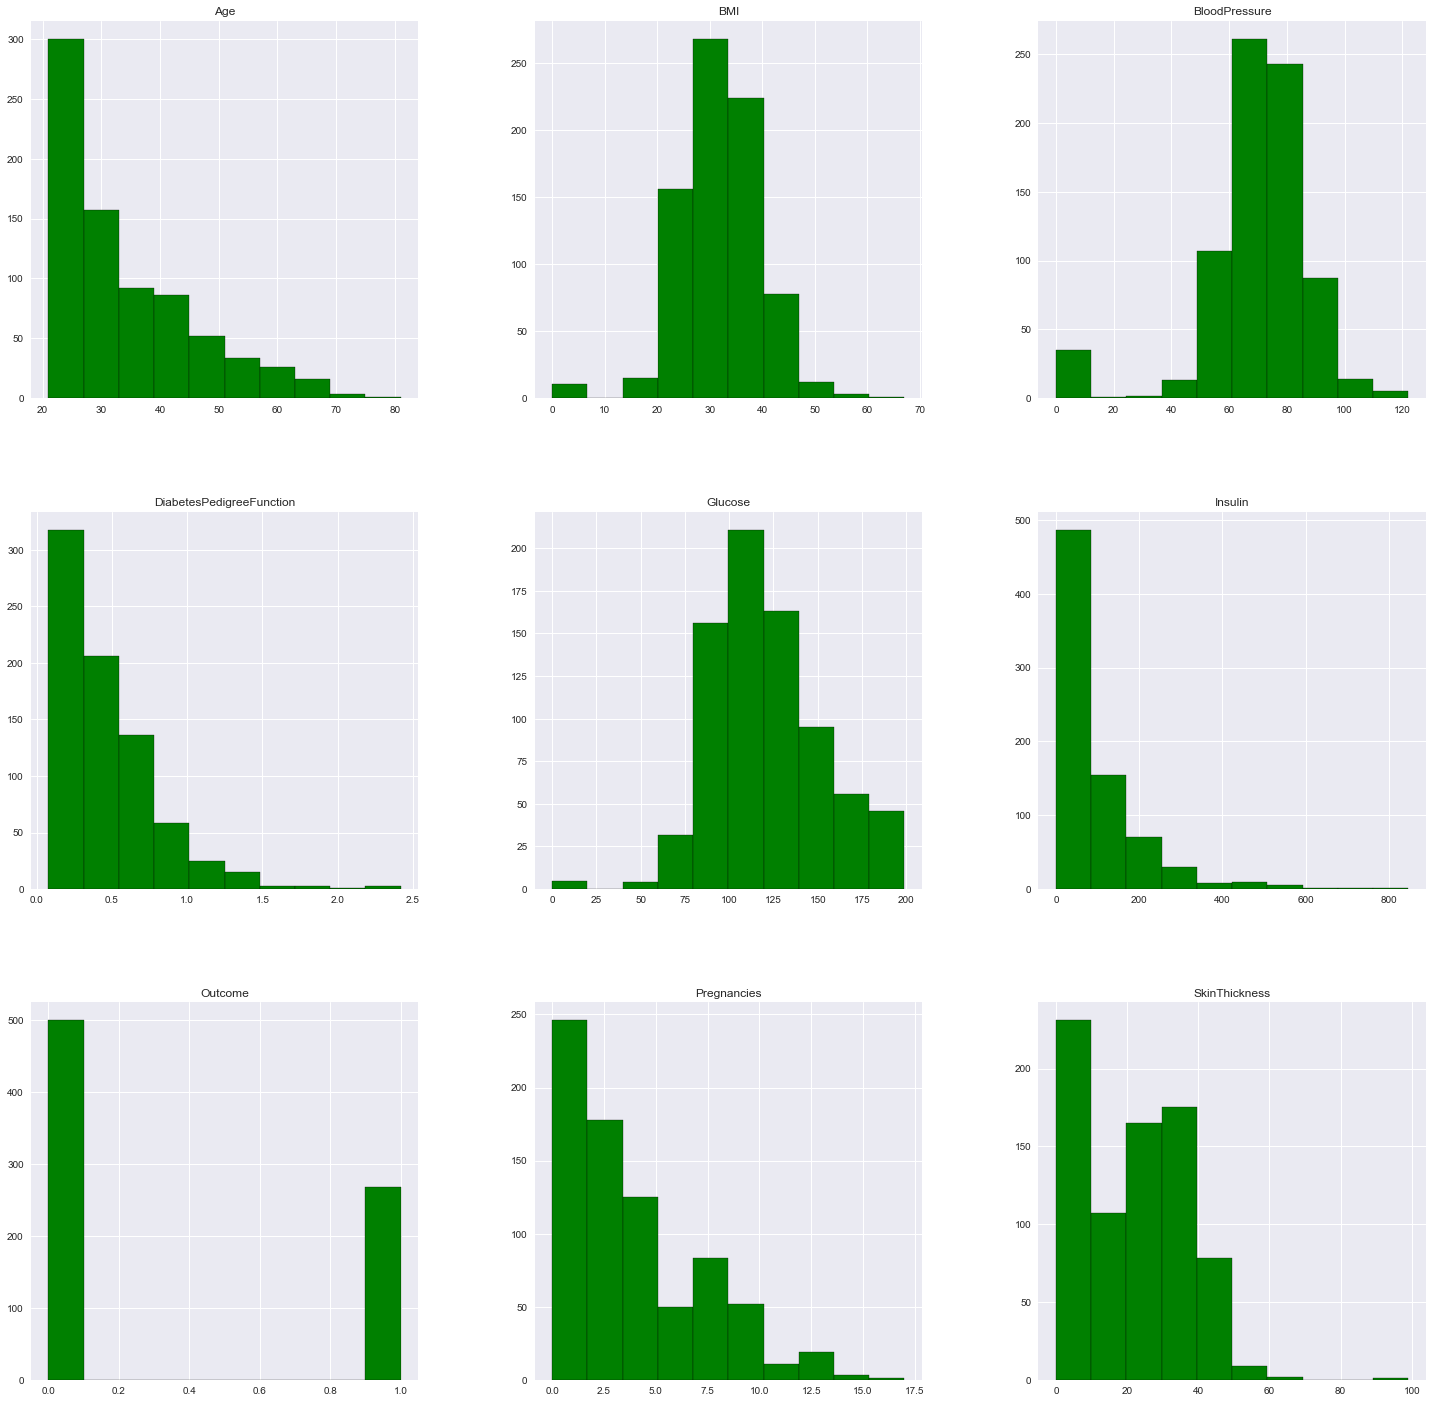

In [153]:
#hitorgtam to see distribution of values..this also shows lot of columns has many zero values and 
input_diabetes_data.hist(figsize = (25,25),color='Green', edgecolor='black')

In [154]:

# as we have seen earlier that there are 0 values in many columns so we will repalce 0 with NaN and will check how much % of each columns have null/Nan
Non_Zero_Columns = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

for col in Non_Zero_Columns :
    input_diabetes_data[col] = input_diabetes_data[col].replace(0,np.NaN)
  
#percentage of records having null values

np.sum(input_diabetes_data.isnull())/input_diabetes_data.shape[0]*100



Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

# replacing 0 values with mean

In [155]:
# now we will calculate mean of each column skipping NULL and then will replace NaN with mean 
Non_Zero_Columns = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

for col in Non_Zero_Columns :

    mean_col = input_diabetes_data[col].mean (skipna =True)
    input_diabetes_data[col] = input_diabetes_data[col].replace(np.NaN,mean_col)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000230B69AA9B0>,
      dtype=object)

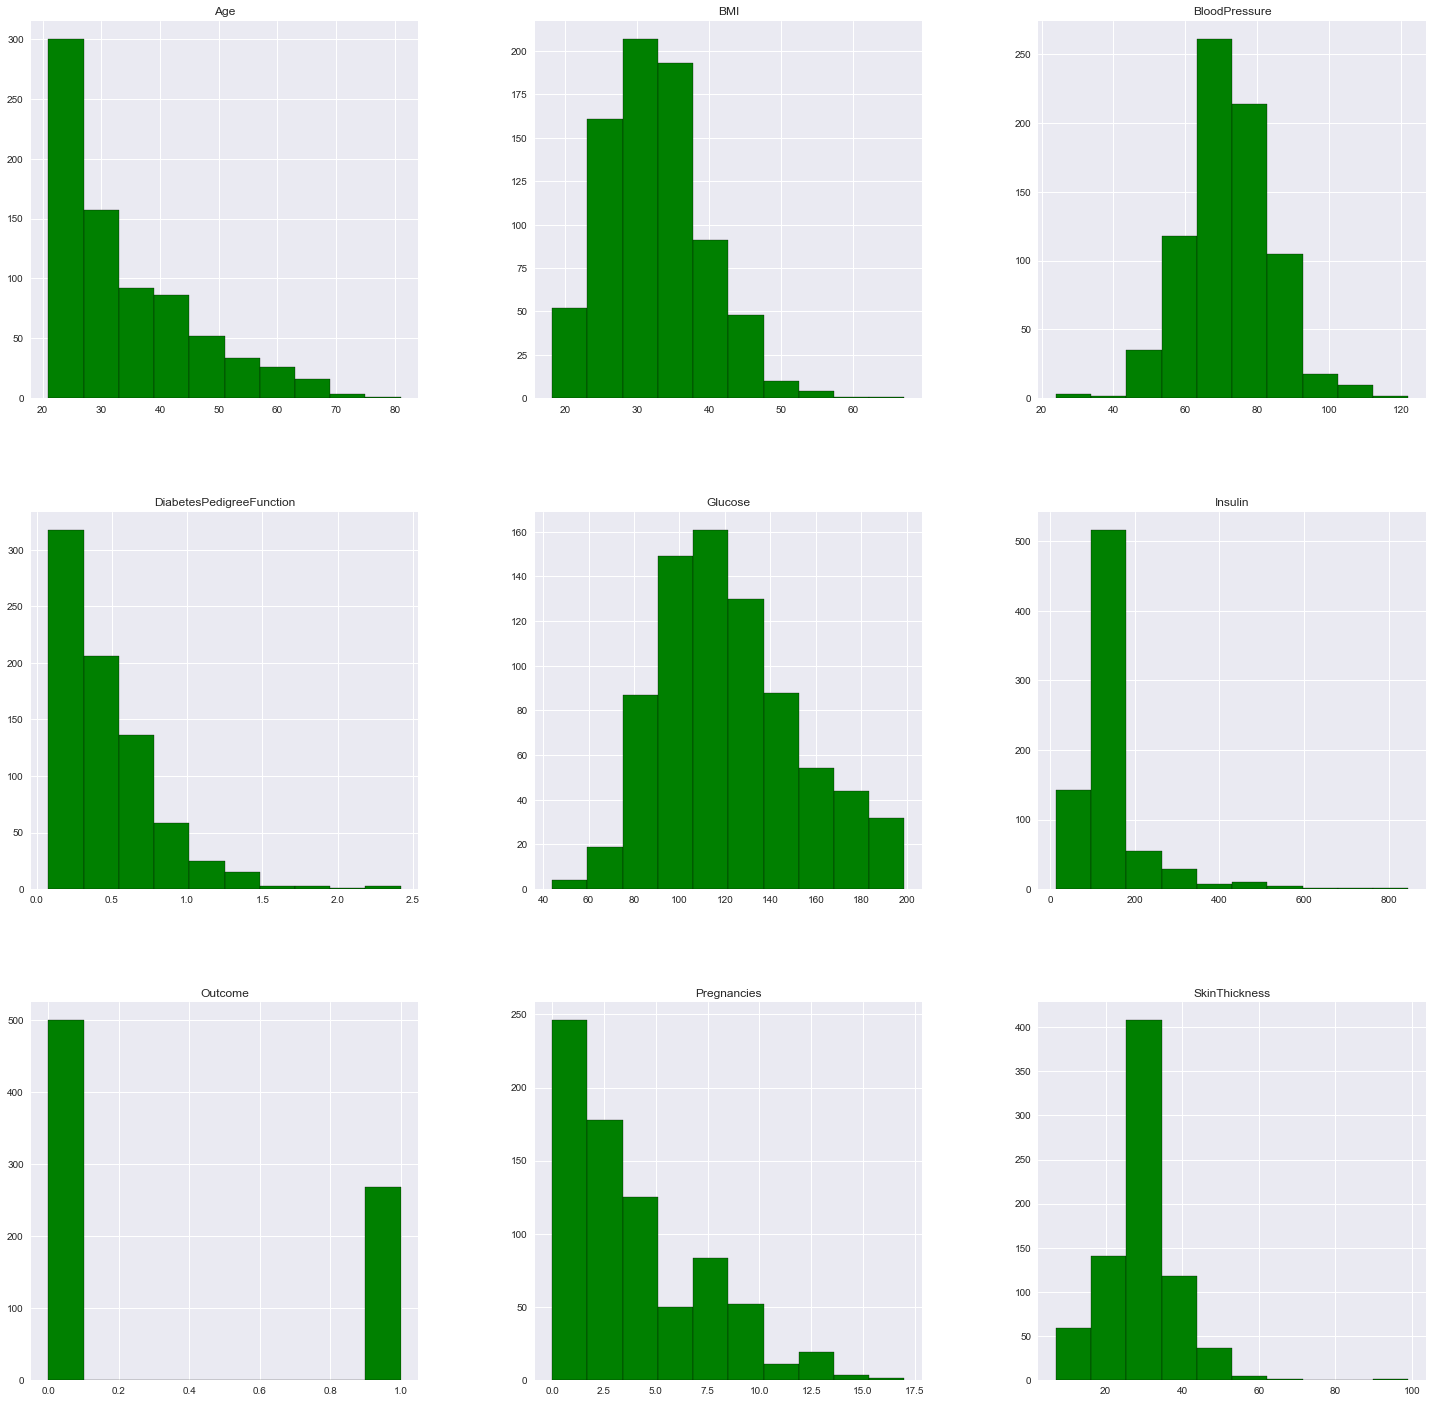

In [156]:
#after replacing 0 with mean values of non zero values of same column. data is in better position to model
input_diabetes_data.hist(figsize = (25,25),color='green', edgecolor='black')

In [157]:
#using describe function to see there are no longer 0 as min values on certain parameters
input_diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.000000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.250000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.000000,122.00
SkinThickness,768.0,29.153420,8.790942,7.000,25.00000,29.153420,32.000000,99.00
Insulin,768.0,155.548223,85.021108,14.000,121.50000,155.548223,155.548223,846.00
BMI,768.0,32.457464,6.875151,18.200,27.50000,32.400000,36.600000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.626250,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.000000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.000000,1.00


In [158]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Applying Machine Learning Model:

In [159]:
#taking output columns in seprate data frame y and rest other columns from 0 to 7 in X
X = input_diabetes_data.iloc[:,0:8]
y = input_diabetes_data.iloc[:,8]
print(y)

0      1

1      0

2      1

3      0

4      1

5      0

6      1

7      0

8      1

9      1

10     0

11     1

12     0

13     1

14     1

15     1

16     1

17     1

18     0

19     1

20     0

21     0

22     1

23     1

24     1

25     1

26     1

27     0

28     0

29     0

      ..

738    0

739    1

740    1

741    0

742    0

743    1

744    0

745    0

746    1

747    0

748    1

749    1

750    1

751    0

752    0

753    1

754    1

755    1

756    0

757    1

758    0

759    1

760    0

761    1

762    0

763    0

764    0

765    0

766    1

767    0

Name: Outcome, Length: 768, dtype: int64


In [160]:
#spiliting data into training set and test data set 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=0,stratify=y)

In [161]:
#applying sclaing on input X 
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


In [162]:
#choosing the right value of K. it should ne near sqrt of total data sets 
import math 
print(math.sqrt(input_diabetes_data.shape[0]))

27.712812921102035


In [163]:

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(27)
knn.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=27, p=2,
           weights='uniform')

In [164]:
knn.score(X_train,y_train)

0.779296875

In [165]:
knn.score(X_test,y_test)

0.75390625

In [166]:
y_pred = knn.predict(X_test)


In [167]:
print(y_pred)

[0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 1 0 1

 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0

 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0

 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 0 0 1

 0 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0

 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0

 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0]


In [168]:
#print confusion matrix for k=27
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[144  23]

 [ 40  49]]


In [169]:
print(accuracy_score(y_test, y_pred))

0.75390625


# Parameter Hypertuning

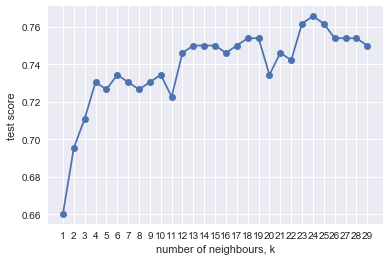

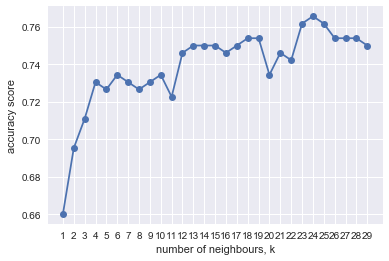

In [170]:
#run the score and accuracy score for each value of k from 1 to 30 to know the value of k 
#where we have highest score of this model 
ks = range(1, 30)
test_score_arr = []
test_accuracy_arr = []

for k in ks:
    
    knn = KNeighborsClassifier(k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    score = knn.score(X_test,y_test)
    test_score_arr.append(score)
    accuracy = accuracy_score(y_test, y_pred)
    test_accuracy_arr.append(accuracy)
# Plot k vs score
plt.plot(ks, test_score_arr, '-o')
plt.xlabel('number of neighbours, k')
plt.ylabel('test score')
plt.xticks(ks)
plt.show()
# Plot k vs accuracy score
plt.plot(ks, test_accuracy_arr, '-o')
plt.xlabel('number of neighbours, k')
plt.ylabel('accuracy score')
plt.xticks(ks)
plt.show()

### Model Accuracy

In [171]:
    #we have seen from above graph that model has highest accuracy at k=24
    
    print(test_accuracy_arr[23])
    knn = KNeighborsClassifier(24)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    score = knn.score(X_test,y_test)
    print(score)
    accuracy = accuracy_score(y_test, y_pred)
    print('accuracy score of k=24 is')
    print(accuracy)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    

0.765625

0.765625

accuracy score of k=24 is

0.765625

[[147  20]

 [ 40  49]]


## Data Visualisation

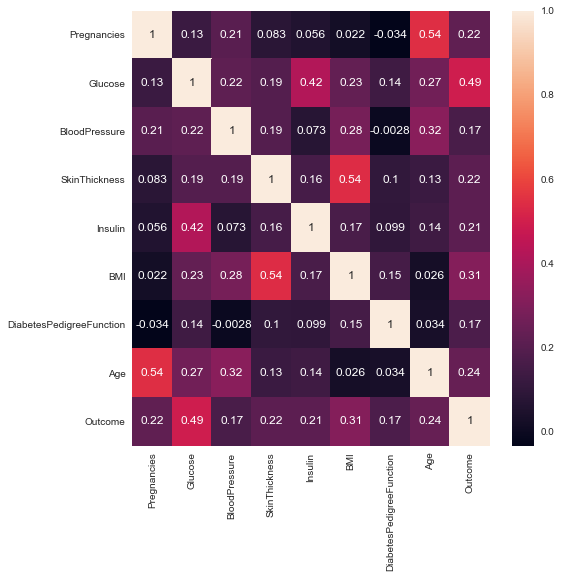

In [172]:
#corelation to understand coorelation among parameters
import seaborn as sns
sns.set()
plt.figure(figsize=(8,8))  # on this line I just set the size of figure to 14 by 10.
p=sns.heatmap(input_diabetes_data.corr(), annot=True)  

Text(0.5,1,'Diabetes Outcome')

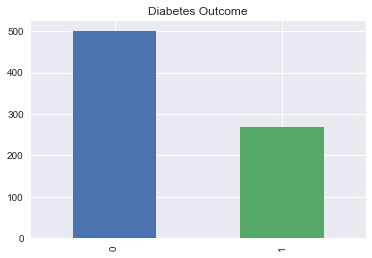

In [173]:
#checking hows diabetic outcome( 0/1) been distributed via Barchart
input_diabetes_data['Outcome'].value_counts().plot(kind='bar').set_title('Diabetes Outcome')

Text(0,0.5,'Age of Patient')

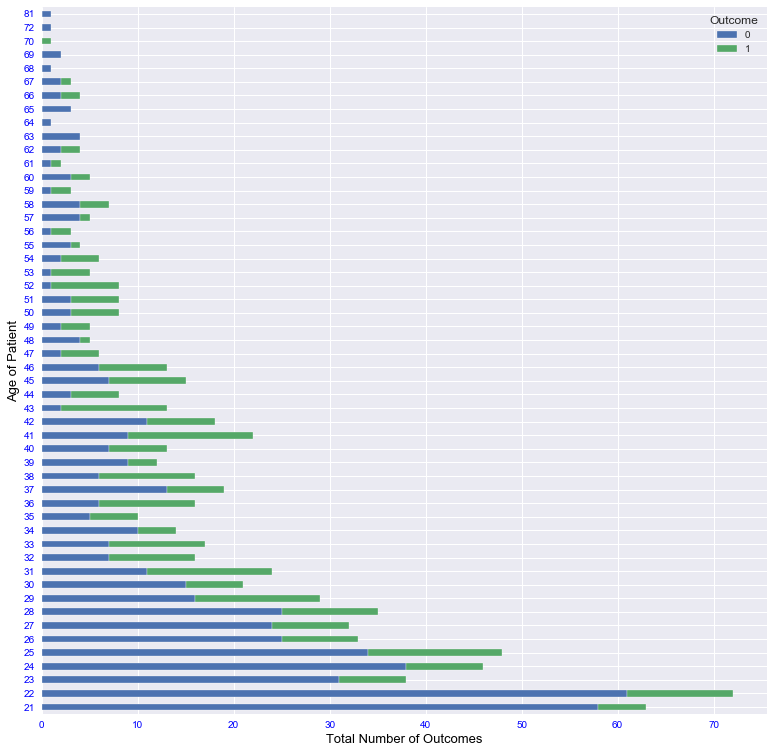

In [174]:
# we would like to see if there any trend between age and outcome. how it various with age
data_grp = input_diabetes_data.groupby(['Age','Outcome'])['Outcome'].count().unstack()
data_grp.plot(kind='barh',stacked='True', figsize= (13,13), edgecolor= 'white') 
plt.xticks(color='blue')
plt.yticks(color='blue')
plt.xlabel('Total Number of Outcomes', color='black', fontsize=13)
plt.ylabel('Age of Patient', color='black', fontsize=13)